In [337]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import re

In [338]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings("ignore")


In [339]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Exploration

In [340]:
mobile_data = pd.read_csv('/content/Processed_Flipdata - Processed_Flipdata.csv')

In [341]:
mobile_data

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
5,5,Infinix HOT 30i,Glacier Blue,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
6,6,Infinix HOT 30i,Mirror Black,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
7,7,Infinix HOT 30i,Diamond White,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
8,8,Infinix HOT 30i,Diamond White,64,4,5000,50MP,5MP,1,16.76,G37,"7,999"
9,9,Infinix HOT 30i,Mirror Black,64,4,5000,50MP,5MP,1,16.76,G37,"7,999"


In [342]:
# dropping the columns

mobile_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [343]:
# converting dtype of price column(object to integer type):
mobile_data['Prize'] =mobile_data['Prize'].str.replace(',','').astype('int64')

In [344]:
mobile_data.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [345]:
mobile_data.tail()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999
540,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,15999


In [346]:
mobile_data['Rear Camera'] = mobile_data['Rear Camera'].apply(extract_numeric)
mobile_data['Front Camera'] = mobile_data['Front Camera'].apply(extract_numeric)
mobile_data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
5,Infinix HOT 30i,Glacier Blue,128,8,5000,50,5,1,16.76,G37,8999
6,Infinix HOT 30i,Mirror Black,128,8,5000,50,5,1,16.76,G37,8999
7,Infinix HOT 30i,Diamond White,128,8,5000,50,5,1,16.76,G37,8999
8,Infinix HOT 30i,Diamond White,64,4,5000,50,5,1,16.76,G37,7999
9,Infinix HOT 30i,Mirror Black,64,4,5000,50,5,1,16.76,G37,7999


In [347]:
mobile_data = mobile_data.rename(columns={'Battery_':'Battery','Rear Camera':'Rear_camera_mp','Front Camera':'Front_Camera_mp','Processor_':'Processor','Prize':'Price'})
mobile_data.head()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999


In [348]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            541 non-null    object 
 1   Colour           541 non-null    object 
 2   Memory           541 non-null    int64  
 3   RAM              541 non-null    int64  
 4   Battery          541 non-null    int64  
 5   Rear_camera_mp   541 non-null    int64  
 6   Front_Camera_mp  541 non-null    int64  
 7   AI Lens          541 non-null    int64  
 8   Mobile Height    541 non-null    float64
 9   Processor        541 non-null    object 
 10  Price            541 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 46.6+ KB


In [349]:
mobile_data.shape

(541, 11)

In [350]:
# calculating the missing values:
def calculate_missing_values(data):
    missing_values = data.isnull().sum()
    return missing_values



missing_data = calculate_missing_values(mobile_data)
print(missing_data)

Model              0
Colour             0
Memory             0
RAM                0
Battery            0
Rear_camera_mp     0
Front_Camera_mp    0
AI Lens            0
Mobile Height      0
Processor          0
Price              0
dtype: int64


In [351]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns = ['Count','Missing','Unique','Dtype','Numeric','Mode','Mean','Min','25%','Median','75%','Max','Std','skew','Kurt'])


    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtypes,
                                  pd.api.types.is_numeric_dtype(df[col]),df[col].mode().values[0],df[col].mean(),df[col].min(),
                                  df[col].quantile(0.25),df[col].median(),df[col].quantile(0.75),df[col].max(),df[col].std(),
                                  df[col].skew(),df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtypes,
                                  pd.api.types.is_numeric_dtype(df[col]),df[col].mode().values[0],'-','-',
                                  '-','-','-','-','-','-','-']
    return output_df

unistats(mobile_data)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,skew,Kurt
Model,541,0,187,object,False,REDMI Note 12 Pro 5G,-,-,-,-,-,-,-,-,-
Colour,541,0,275,object,False,Yellow,-,-,-,-,-,-,-,-,-
Memory,541,0,5,int64,True,128,110.550832,16,64.0,128.0,128.0,256,60.600694,1.029704,0.855888
RAM,541,0,5,int64,True,4,5.397412,2,4.0,6.0,8.0,8,1.984923,0.067617,-1.306301
Battery,541,0,37,int64,True,5000,4871.5878,800,5000.0,5000.0,5000.0,7000,780.148862,-3.30425,14.752188
Rear_camera_mp,541,0,14,int64,True,50,46.110906,0,13.0,50.0,50.0,200,31.260416,1.799491,7.227342
Front_Camera_mp,541,0,13,int64,True,16,11.992606,0,5.0,8.0,16.0,60,9.053746,2.492864,8.756549
AI Lens,541,0,2,int64,True,0,0.062847,0,0.0,0.0,0.0,1,0.242911,3.612638,11.092146
Mobile Height,541,0,38,float64,True,16.76,16.431201,4.5,16.51,16.71,16.94,41.94,2.523553,1.171778,48.220112
Processor,541,0,123,object,False,Qualcomm Snapdragon 680,-,-,-,-,-,-,-,-,-


#Finding out the frant camera megapixel column we find that mean is 11.992606 and max is 60.Skewness is 2.492 which is greater than 2 which is generally not acceptable so we must calculate the outliers and if available we must remove it we must check for the outliers for all the numerical variables

In [352]:
mobile_data.describe(include = 'object')
## here we can clearly see there are 187 unique set of model majority is vivo Y16 having frequency of 9
# similarly in processor- majority is of  "Qualcomm Snapdragon 680" processor with frequency of 33

,Model,Colour,Processor
count,541,541,541
unique,187,275,123
top,vivo Y16,Yellow,Qualcomm Snapdragon 680
freq,9,12,33


Numerical features in the dataset

In [353]:
## 1.  Discrete Variables
numerical_features = [feature for feature in mobile_data.columns if mobile_data[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(mobile_data[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


In [354]:
numerical_features

['Memory',
 'RAM',
 'Battery',
 'Rear_camera_mp',
 'Front_Camera_mp',
 'AI Lens',
 'Mobile Height',
 'Price']

In [355]:
discrete_feature

['Memory', 'RAM', 'Rear_camera_mp', 'Front_Camera_mp', 'AI Lens']

In [356]:
#2.Continous variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [357]:
continuous_feature

['Battery', 'Mobile Height', 'Price']

Analysing continues variables by creating histograms to understand the distribution

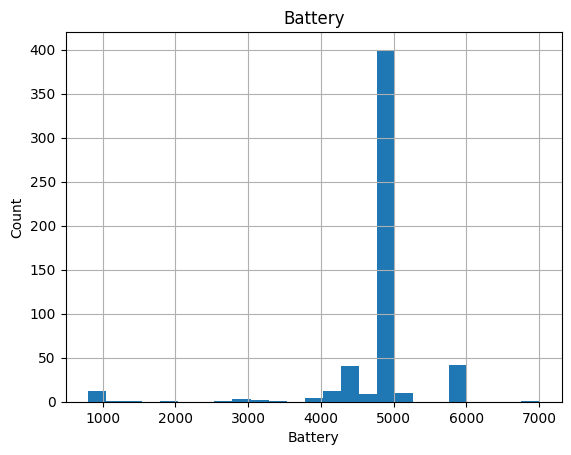

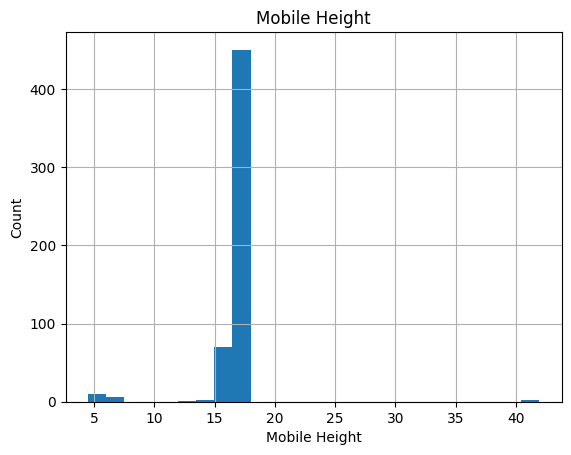

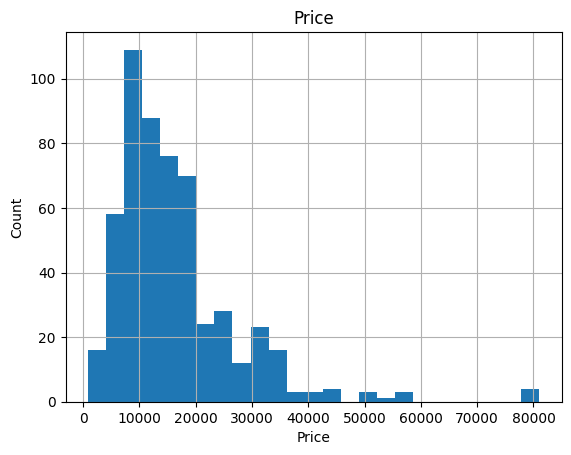

In [358]:

for feature in continuous_feature:
    data=mobile_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Price is rightskewed it means the majority of mobile the mobile prices are concentrated towards the lower end of the price range with a few high priced outliers pulling the mean or median price upwords

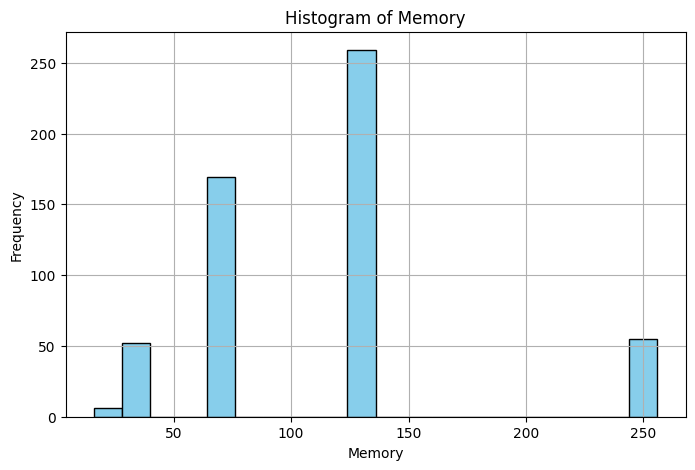

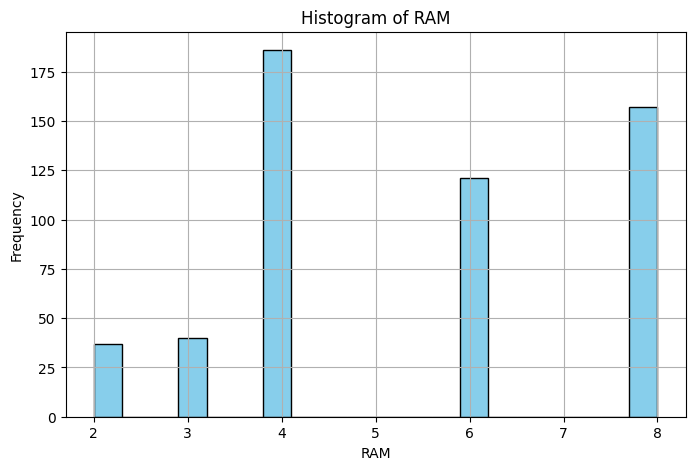

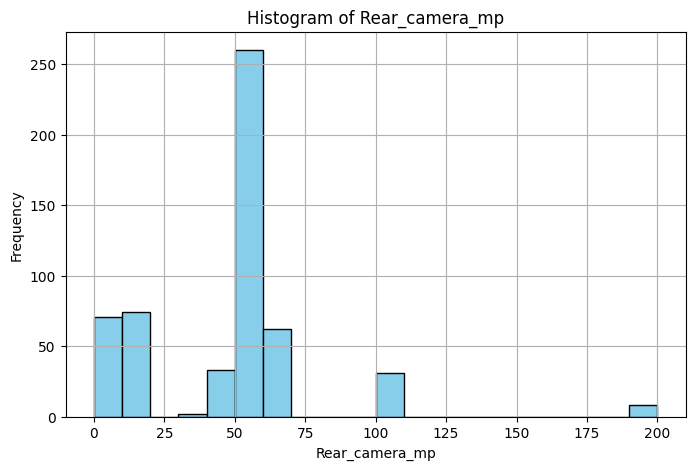

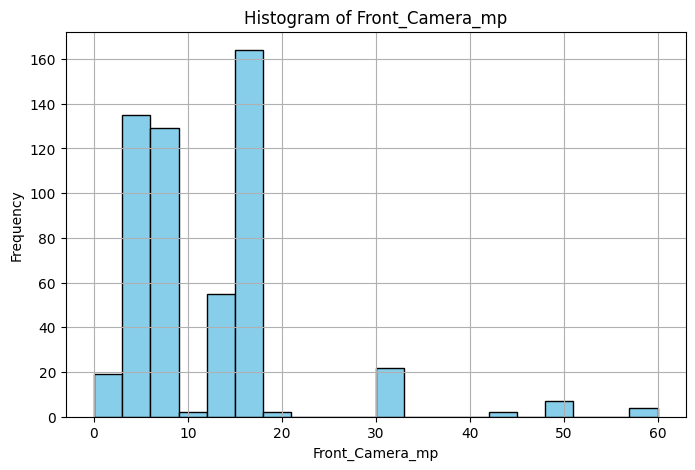

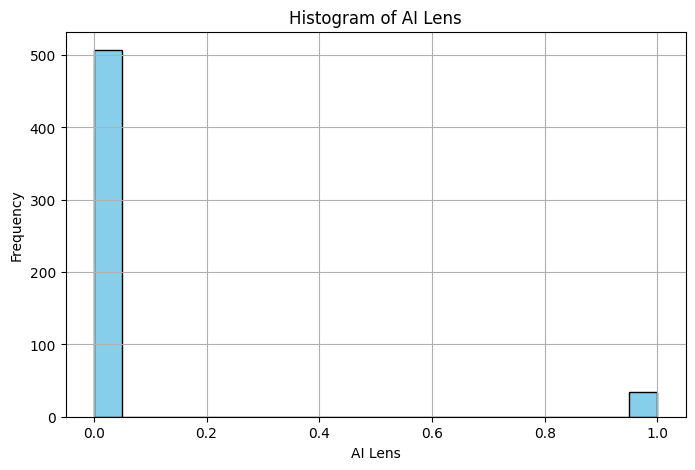

In [359]:
for col in discrete_feature:
        plt.figure(figsize=(8, 5))
        plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

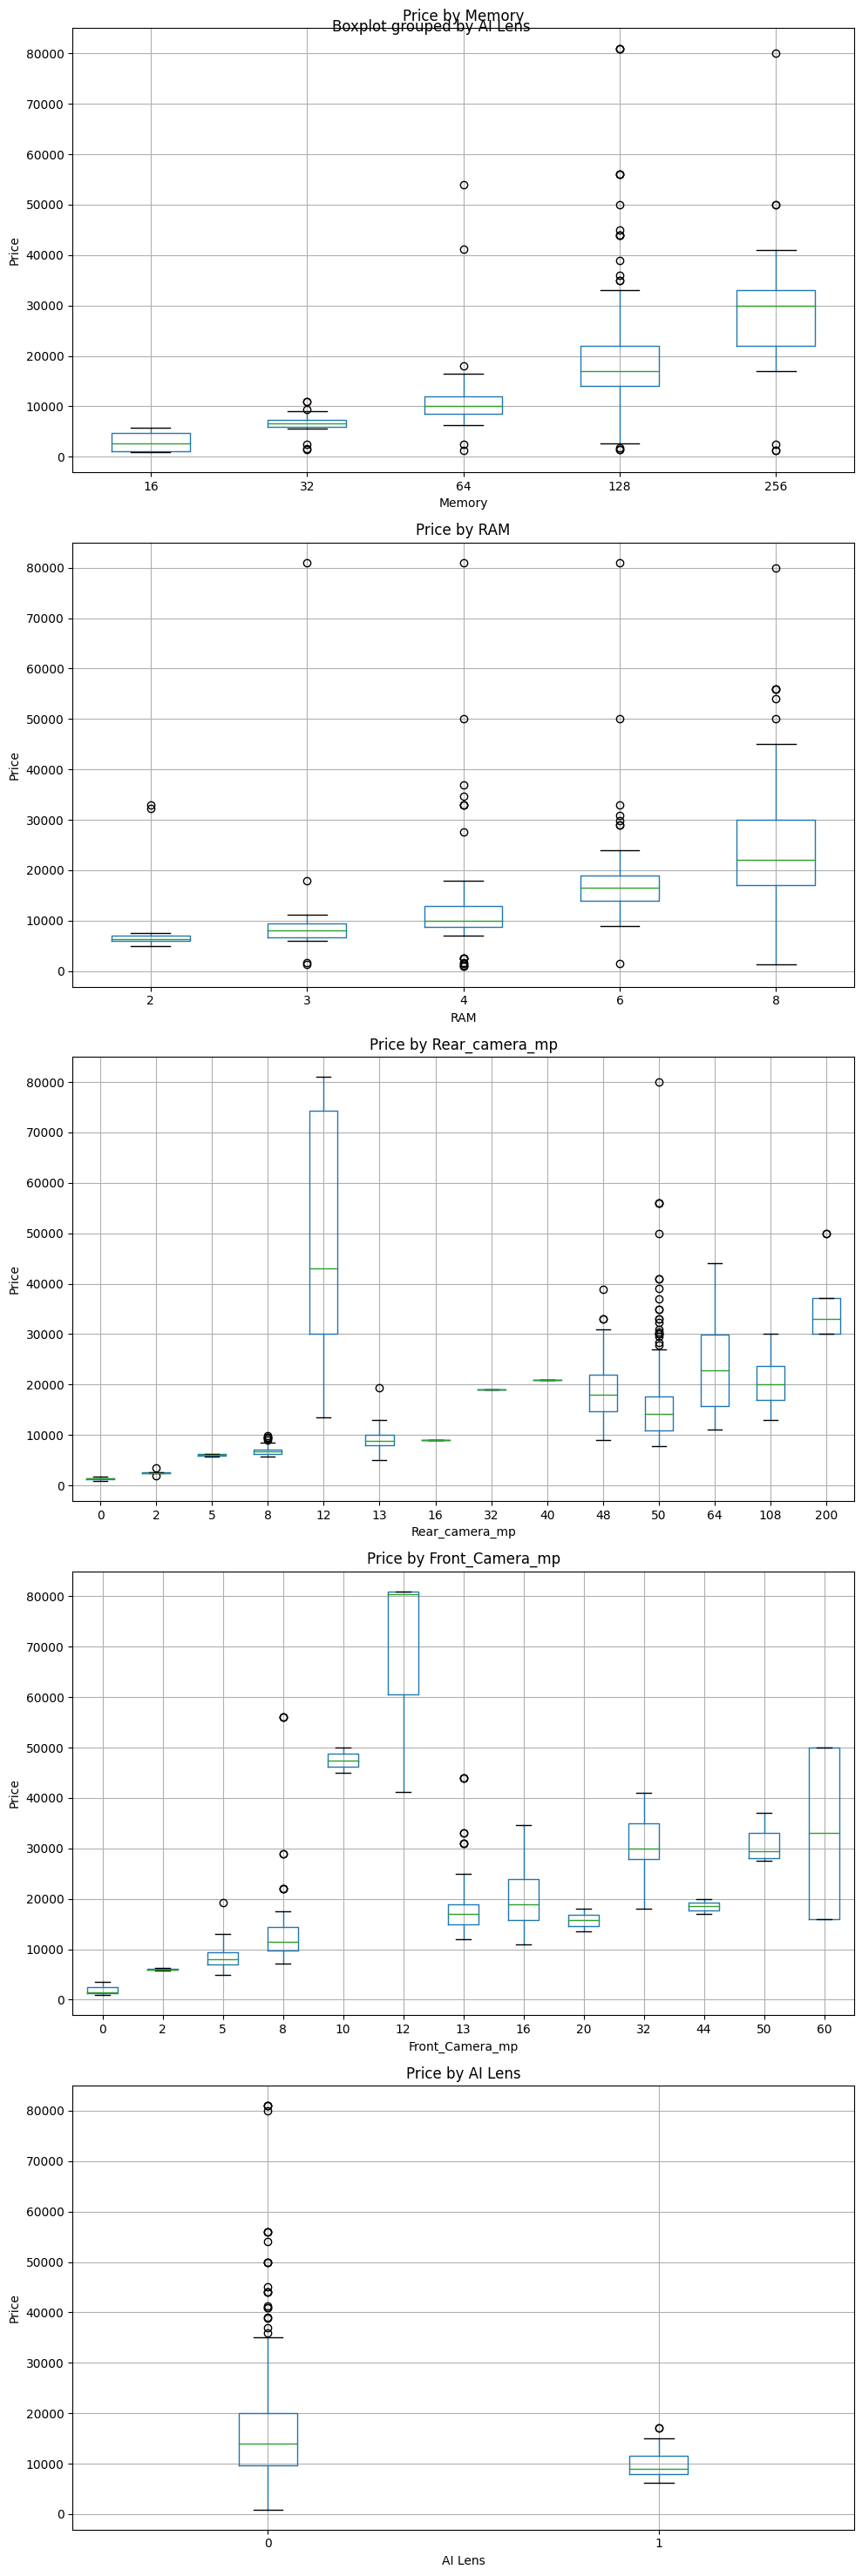

In [360]:
fig, axes = plt.subplots(nrows=len(discrete_feature), ncols=1, figsize=(10, 6*len(discrete_feature)))

for i, feature in enumerate(discrete_feature):
    ax = axes[i]
    mobile_data.boxplot(column='Price', by=feature, ax=ax)
    ax.set_title(f'Price by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    ax.grid(True)

plt.tight_layout()
plt.show()

Here we found that there is a positive correlation between sale price and discreate feature there are outliers present in the discreate feature

Outliers

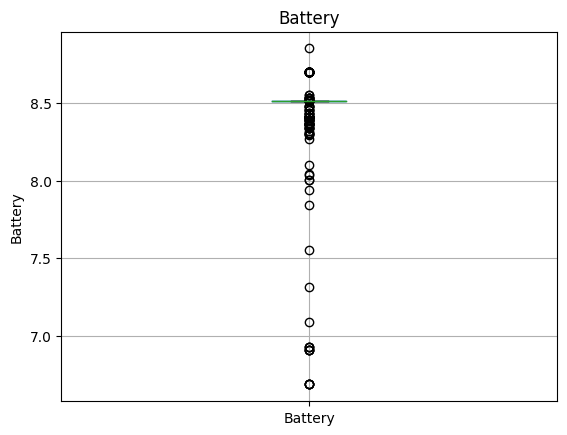

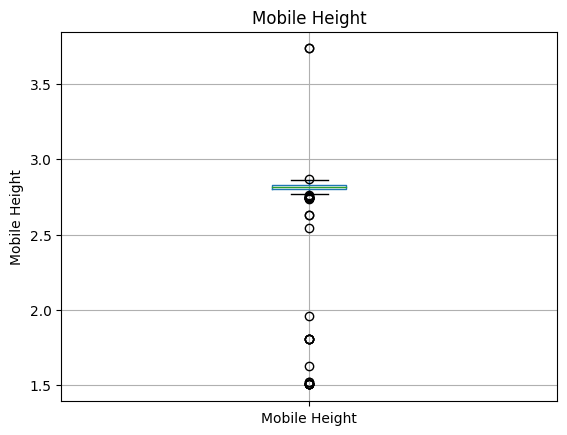

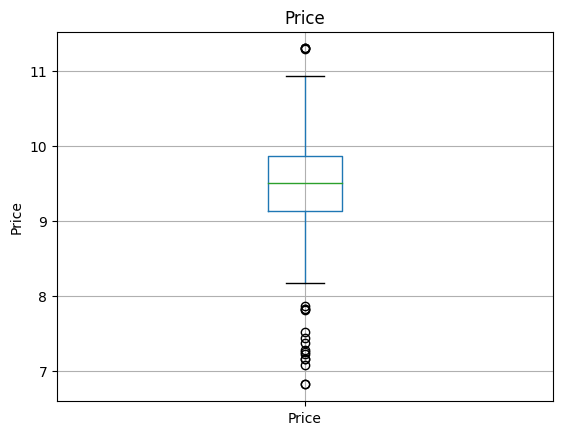

In [361]:
for feature in continuous_feature:
    data=mobile_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [362]:
def get_categorical_features(data):
    categorical_columns = data.select_dtypes(include=['object', 'category'])
    return categorical_columns

categorical_features = get_categorical_features(mobile_data)
categorical_features.head()

,Model,Colour,Processor
0,Infinix SMART 7,Night Black,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,G37


In [363]:
# unique value for categorical variables:

for column in mobile_data.columns:
    if mobile_data[column].dtype =="object":
        print(column.upper(), ": ",mobile_data[column].nunique())
        print(mobile_data[column].value_counts())
        print("\n")
        print("*"*65)
        print("\n")

MODEL :  187
Model
vivo Y16                              9
realme C55                            9
SAMSUNG Galaxy A14 5G                 9
REDMI Note 12 Pro 5G                  9
vivo T1 44W                           8
Infinix HOT 30i                       8
REDMI 10                              8
SAMSUNG Galaxy F14 5G                 8
vivo T2x 5G                           8
realme C33 2023                       6
realme 9i 5G                          6
REDMI Note 12                         6
REDMI K50i 5G                         6
REDMI Note 12 5G                      6
REDMI 11 Prime                        6
realme 10 Pro 5G                      6
POCO M5                               6
POCO X5 Pro 5G                        6
REDMI Note 12 Pro+ 5G                 6
SAMSUNG Galaxy F23 5G                 6
POCO F5 5G                            6
REDMI A1+                             6
realme 10 Pro+ 5G                     6
SAMSUNG Galaxy F13                    6
POCO X4 Pro 5G       

In [364]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(mobile_data[feature].unique())))

The feature is Model and number of categories are 187
The feature is Colour and number of categories are 275
The feature is Processor and number of categories are 123


Find out the relationship between continuous varible and dependent feature sale price of the mobile

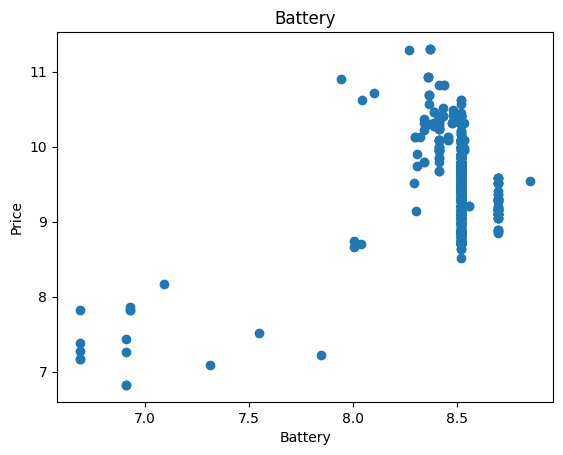

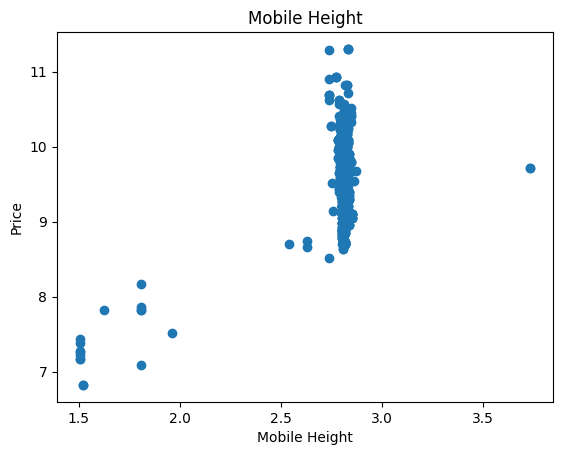

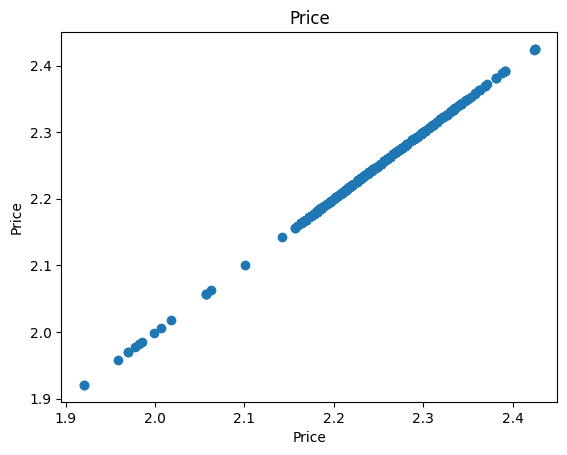

In [365]:
for feature in continuous_feature:
    data=mobile_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

Here we found that there are positive correlation between the continous variables and sale price but there are outlierswhich are affecting the price.So we need to treat the outliers correctly

2.Data Preprocessing

Converting categorical values into numerical format using ordinal encoding

In [366]:
from sklearn.preprocessing import OrdinalEncoder
encoded_column = ['Model','Colour','Processor']
encoder = OrdinalEncoder()
mobile_data[encoded_column] = encoder.fit_transform(mobile_data[encoded_column])
mobile_data.head()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
0,23.0,159.0,64,4,6000,13,5,1,16.76,113.0,7299
1,23.0,20.0,64,4,6000,13,5,1,16.76,113.0,7299
2,37.0,149.0,128,8,5000,50,16,0,16.64,75.0,11999
3,69.0,201.0,32,2,5000,8,5,0,16.56,56.0,5649
4,12.0,130.0,128,8,5000,50,5,1,16.76,14.0,8999


In [367]:
mobile_data['RAM'].unique()

array([4, 8, 2, 6, 3])

In [368]:
#converting Memory,ram,Battery,and Ai lense to object

mobile_data['RAM'] = mobile_data['RAM'].astype('object')
mobile_data['Battery'] = mobile_data['Battery'].astype('object')
mobile_data['AI Lens'] = mobile_data['AI Lens'].astype('object')

In [369]:
mobile_data.info()#information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            541 non-null    float64
 1   Colour           541 non-null    float64
 2   Memory           541 non-null    int64  
 3   RAM              541 non-null    object 
 4   Battery          541 non-null    object 
 5   Rear_camera_mp   541 non-null    int64  
 6   Front_Camera_mp  541 non-null    int64  
 7   AI Lens          541 non-null    object 
 8   Mobile Height    541 non-null    float64
 9   Processor        541 non-null    float64
 10  Price            541 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 46.6+ KB


Replacing the outliers with the IQR

In [370]:
Q1 = mobile_data.quantile(0.25)
Q3 = mobile_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Model                89.0
Colour              133.0
Memory               64.0
RAM                   4.0
Battery               0.0
Rear_camera_mp       37.0
Front_Camera_mp      11.0
AI Lens               0.0
Mobile Height        0.43
Processor            43.0
Price              9990.0
dtype: object


In [371]:
# getting column with the outliers:
(((mobile_data < (Q1 - 1.5 * IQR)) |(mobile_data > (Q3 + 1.5 * IQR)))==True).any()

Model              False
Colour             False
Memory              True
RAM                False
Battery             True
Rear_camera_mp      True
Front_Camera_mp     True
AI Lens             True
Mobile Height       True
Processor          False
Price               True
dtype: bool

In [372]:
def replace_outliers_with_iqr(data, threshold=1.5):

    numerical_columns = data.select_dtypes(include=['number']).columns

    for col in numerical_columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        data[col] = data[col].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else data[col].median())

    return data



mobile_data = replace_outliers_with_iqr(mobile_data)

In [373]:
(((mobile_data < (Q1 - 1.5 * IQR)) |(mobile_data > (Q3 + 1.5 * IQR)))==True).any()

Model              False
Colour             False
Memory             False
RAM                False
Battery             True
Rear_camera_mp     False
Front_Camera_mp    False
AI Lens             True
Mobile Height      False
Processor          False
Price              False
dtype: bool

In [374]:
mobile_data.shape

(541, 11)

In [375]:
mobile_data_clean = mobile_data.copy()

In [376]:
mobile_data_clean.to_csv('Newdata.csv')

# Here outliers remove from the dataset

Feature extraction

In [377]:
#Feature affecting the price:

mobile_data_clean.corr(numeric_only = True)['Price'].sort_values(ascending = False)

Price              1.000000
Front_Camera_mp    0.668308
Memory             0.656482
Rear_camera_mp     0.587813
Model              0.124920
Mobile Height      0.109338
Colour             0.058503
Processor         -0.094905
Name: Price, dtype: float64

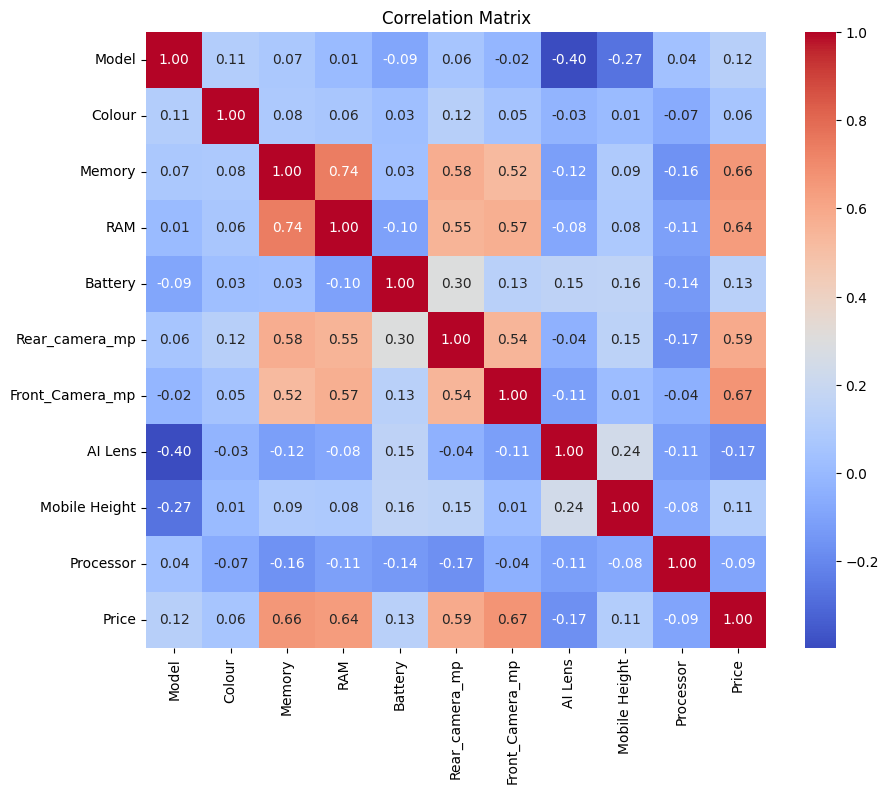

In [378]:
# Calculate correlation matrix
corr_matrix = mobile_data_clean.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Here we found that storage capacity is the most important feature affecting the price of the mobile phone following rear camera megapixel

<Axes: xlabel='Memory', ylabel='Price'>

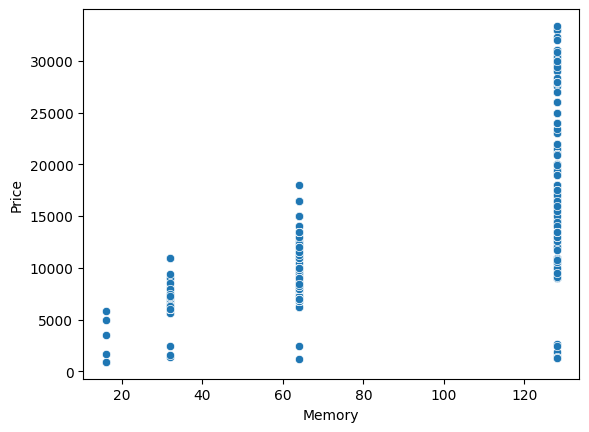

In [379]:
sns.scatterplot(data =mobile_data_clean, x='Memory', y='Price')

In the Scatter plot here we can see as memory storage increases price of the product also increase


In [380]:
mobile_data.isnull().sum()

Model              0
Colour             0
Memory             0
RAM                0
Battery            0
Rear_camera_mp     0
Front_Camera_mp    0
AI Lens            0
Mobile Height      0
Processor          0
Price              0
dtype: int64

In [381]:
mobile_data.isnull().sum()/mobile_data.shape[0]*10

Model              0.0
Colour             0.0
Memory             0.0
RAM                0.0
Battery            0.0
Rear_camera_mp     0.0
Front_Camera_mp    0.0
AI Lens            0.0
Mobile Height      0.0
Processor          0.0
Price              0.0
dtype: float64

#4.Model building

In [382]:
mobile_data_clean

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
0,23.0,159.0,64.0,4,6000,13.0,5.0,1,16.76,113.0,7299.0
1,23.0,20.0,64.0,4,6000,13.0,5.0,1,16.76,113.0,7299.0
2,37.0,149.0,128.0,8,5000,50.0,16.0,0,16.64,75.0,11999.0
3,69.0,201.0,32.0,2,5000,8.0,5.0,0,16.56,56.0,5649.0
4,12.0,130.0,128.0,8,5000,50.0,5.0,1,16.76,14.0,8999.0
5,12.0,88.0,128.0,8,5000,50.0,5.0,1,16.76,14.0,8999.0
6,12.0,151.0,128.0,8,5000,50.0,5.0,1,16.76,14.0,8999.0
7,12.0,65.0,128.0,8,5000,50.0,5.0,1,16.76,14.0,8999.0
8,12.0,65.0,64.0,4,5000,50.0,5.0,1,16.76,14.0,7999.0
9,12.0,151.0,64.0,4,5000,50.0,5.0,1,16.76,14.0,7999.0


In [383]:
X = mobile_data_clean.drop('Price',axis=1)
y = mobile_data_clean['Price']

In [384]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [385]:
X_train.head()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor
329,3.0,274.0,128.0,8,4500,50.0,16.0,0,16.64,87.0
16,12.0,130.0,64.0,4,5000,50.0,5.0,1,16.76,14.0
85,153.0,252.0,64.0,4,5000,64.0,8.0,0,17.07,21.0
518,91.0,182.0,128.0,8,5080,64.0,16.0,0,16.76,8.0
407,9.0,195.0,64.0,4,6000,13.0,8.0,0,17.32,115.0


In [386]:
y_train.head()

329    30999.0
16      7999.0
85     10999.0
518    29990.0
407     8999.0
Name: Price, dtype: float64

Standard Scaler

In [387]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [388]:
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [389]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = X_test.columns)

In [390]:
x_train_scaled.head()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor
0,-1.770429,1.716825,0.791701,1.304180,-0.536182,0.459218,0.805454,-0.263262,-0.355331,0.785821
1,-1.600509,-0.111414,-0.957735,-0.715195,0.152789,0.459218,-0.973959,3.798496,0.144272,-1.465828
2,1.061558,1.437511,-0.957735,-0.715195,0.152789,1.189523,-0.488664,-0.263262,1.434913,-1.249916
3,-0.108997,0.548783,0.791701,1.304180,0.263024,1.189523,0.805454,-0.263262,0.144272,-1.650895
4,-1.657149,0.713833,-0.957735,-0.715195,1.530729,-1.470875,-0.488664,-0.263262,2.475753,1.649467


In [391]:
np.round(x_train_scaled.describe())

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor
count,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.0,-2.0,-6.0,-2.0,-2.0,-0.0,-3.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-0.0,-1.0,-1.0
50%,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
75%,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-0.0,1.0,1.0
max,2.0,2.0,1.0,1.0,3.0,1.0,3.0,4.0,3.0,2.0


#Linear Regression

In [392]:
linearmodel = LinearRegression()

In [393]:
linearmodel.fit(X_train,y_train)

LinearRegression()

In [394]:
linearmodel.score(X_test,y_test)

0.6280204977724704

In [395]:
linearmodel.coef_

array([ 1.60e+01, -1.44e+00,  4.54e+01,  6.08e+02,  5.60e-01,  4.38e+01,
        4.36e+02, -1.22e+03,  1.44e+03,  1.21e+00])

#Predict the model

In [396]:
y_pred = linearmodel.predict(X_test)

In [397]:
y_pred

array([18109.14, 15758.55, 18655.01, 15209.09, 19527.26, 19254.13,
       12159.3 ,  4352.7 , 13196.7 ,  4647.28,  6979.18, 20036.45,
       15971.91, 20223.87, 26937.13, 10887.58,  5068.03,  7757.44,
       20987.9 ,  2550.14,  5735.07, 19260.78,  6880.43,  7552.11,
        9442.84, 21110.39, 18036.18, 17530.49, 17593.74,  7512.05,
       25881.43, 11767.72, 15342.69,  6077.89, 19782.65, 10966.73,
       11515.49,  7101.65, 10280.83, 20202.84, 10691.56, 26932.8 ,
       12161.2 , 20843.15, 19939.51,  9253.98,  7172.42, 14012.74,
       18514.95, 18351.52,  9325.73,  8195.6 , 19989.15,  2469.52,
        7266.13, 10129.46, 26340.4 , 14389.87,  7749.07, 14800.26,
       13658.84, 19852.34, 20815.68, 18542.56,  7070.01, 13578.03,
       20371.24, 21788.74, 18558.14,  8736.5 ,  6990.8 , 27023.24,
       19348.72, 12918.37, 12641.79,  6360.88,  9246.2 ,  7517.82,
        9703.79, 26957.39, 18417.26, 11313.6 ,  5858.98, 21012.2 ,
       19251.25,  8504.38, 12159.79, 25610.61, 12978.92, 19386

In [398]:
# Errors:
test_residuals = y_test - y_pred

In [399]:

def create_dataframe(column1, column2,column3,col_name1='Column 1', col_name2='Column 2',col_name3='Column 3'):

    if len(column1) != len(column2):
        raise ValueError("Both columns must have the same length.")

    data = {col_name1: column1, col_name2: column2,col_name3:column3}
    df = pd.DataFrame(data)
    return df


Predicted_price = y_pred
actual_price= y_test

comparison = create_dataframe(Predicted_price, actual_price,test_residuals,'Predicted price','Actual price','Error')
print(comparison)

     Predicted price  Actual price         Error
499     18109.144045       16999.0  -1110.144045
486     15758.545497       17499.0   1740.454503
65      18655.014827       14490.0  -4165.014827
41      15209.089474       10999.0  -4210.089474
326     19527.260383       32999.0  13471.739617
403     19254.129819       30999.0  11744.870181
514     12159.296650       11999.0   -160.296650
250      4352.697505        1199.0  -3153.697505
47      13196.704619        9999.0  -3197.704619
172      4647.284341        5999.0   1351.715659
383      6979.180135        9499.0   2519.819865
261     20036.452832       21999.0   1962.547168
528     15971.913609       17499.0   1527.086391
260     20223.870768       21999.0   1775.129232
465     26937.129565       13499.0 -13438.129565
119     10887.580695       11999.0   1111.419305
244      5068.033002        3549.0  -1519.033002
479      7757.441322        8999.0   1241.558678
107     20987.901169       15999.0  -4988.901169
247      2550.143074

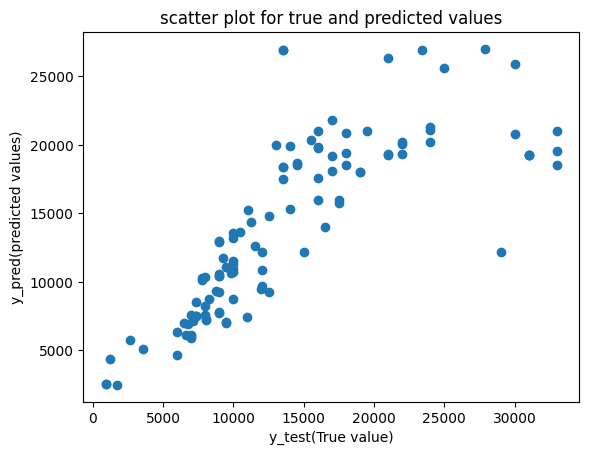

In [400]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test(True value)')
plt.ylabel('y_pred(predicted values)')
plt.title('scatter plot for true and predicted values')
plt.show()

#Model Evaluation

In [401]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [402]:
mobile_data['Price'].mean()

14540.186691312385

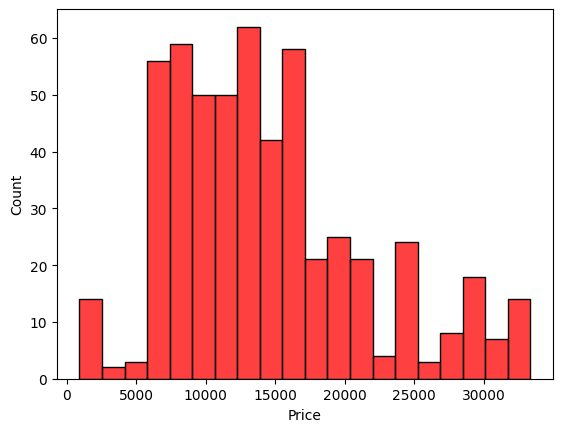

In [403]:
sns.histplot(data=mobile_data,x='Price',bins = 20,color = 'red')
plt.show()

from the above graph we found that the mostly the maximum number of mobile price is between 8000 to 12000  

In [404]:
mean_absolute_error(y_test,y_pred)

3090.434923057258

In [405]:
mean_squared_error(y_test,y_pred)

21489943.524610322

In [406]:
metrics.explained_variance_score(y_test,y_pred)

0.6281145474427088

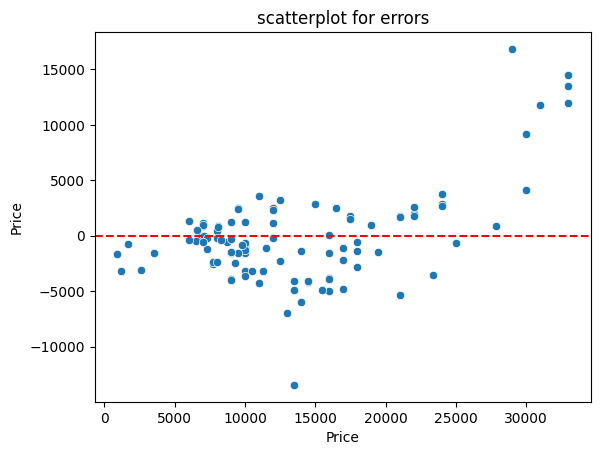

In [407]:
sns.scatterplot(x = y_test,y =test_residuals)
plt.axhline(y=0,color = 'Red',ls = '--')
plt.title('scatterplot for errors')
plt.show()

# No clear line or curve we should not prefer the linear regression

Feature Important analyis

In [408]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery', 'Rear_camera_mp',
       'Front_Camera_mp', 'AI Lens', 'Mobile Height', 'Processor'],
      dtype='object')

In [409]:
coeff_analysis =pd.DataFrame(linearmodel.coef_,X.columns,columns = ['coeff'])

In [410]:
coeff_analysis.sort_values('coeff',ascending = False)

,coeff
Mobile Height,1440.184522
RAM,608.395301
Front_Camera_mp,436.371816
Memory,45.350062
Rear_camera_mp,43.759922
Model,16.048976
Processor,1.208384
Battery,0.559627
Colour,-1.441676
AI Lens,-1223.284753


Ram is the most relevant feature affect the price of the mobile followed by the front mega pixel camera followed by the mobile height

# Decision Tree

In [411]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [412]:
dtmodel.score(X_test,y_test)

0.6422018348623854

In [413]:
base_pred = dtmodel.predict(X_test)
base_pred

array([16999., 17499., 14490., 10999., 32999., 32999., 11980.,  2490.,
        9999.,  5999.,  9790., 18999., 17499., 18990., 13499., 11999.,
        2499.,  8999., 16990.,  6499.,  1449., 20999.,  7280.,  7999.,
       12499., 23999., 18999., 13490., 15999.,  6799., 29999.,  9290.,
       13999.,  6999., 15999.,  9999.,  9999.,  6499.,  7749., 21999.,
        9999., 13499., 28999., 17999., 13999., 12499., 10989., 16499.,
       32999., 32999.,  7961.,  7999., 12999.,  2499., 10989., 11349.,
       20890.,  7749.,  8999., 12499., 10499., 15999., 29999., 14490.,
        9499., 10999., 18990., 16999., 17999.,  9999.,  7245., 28298.,
       20999.,  8999., 12272.,  5999.,  8460.,  6799.,  7961., 18990.,
       13499.,  9999.,  6999., 29999., 32999.,  7299., 14999., 24999.,
        8999., 17999., 15999., 23999., 19499.,  6999.,  8999.,  8999.,
        9499., 16999.,  6999.,  6799.,  8999.,  7999., 32999., 12499.,
       18999.,  6499., 10989., 21999.,  6599.])

In [414]:
from sklearn.metrics import classification_report,confusion_matrix

In [415]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1449.0       0.00      0.00      0.00         0
      1699.0       0.00      0.00      0.00         1
      2490.0       0.00      0.00      0.00         0
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5999.0       1.00      1.00      1.00         2
      6499.0       0.00      0.00      0.00         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7280.0       0.00      0.00      0.00         0
      7299.0       1.00    

In [416]:
print(confusion_matrix(y_test,base_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 1 0 2]]


In [417]:
dtmodel.feature_importances_

array([0.24, 0.1 , 0.03, 0.14, 0.06, 0.05, 0.05, 0.02, 0.13, 0.17])

In [418]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery', 'Rear_camera_mp',
       'Front_Camera_mp', 'AI Lens', 'Mobile Height', 'Processor'],
      dtype='object')

In [419]:
pd.DataFrame(index = X.columns,data = dtmodel.feature_importances_,
            columns = ['Feature Importance']).sort_values('Feature Importance',ascending = False)

,Feature Importance
Model,0.235408
Processor,0.169143
RAM,0.142212
Mobile Height,0.134566
Colour,0.102379
Battery,0.061180
Front_Camera_mp,0.054935
Rear_camera_mp,0.049610
Memory,0.033410
AI Lens,0.017156


According to the model Decision tree model affect the price most

Text(0.5, 1.0, 'correlation analysis of most relevant features')

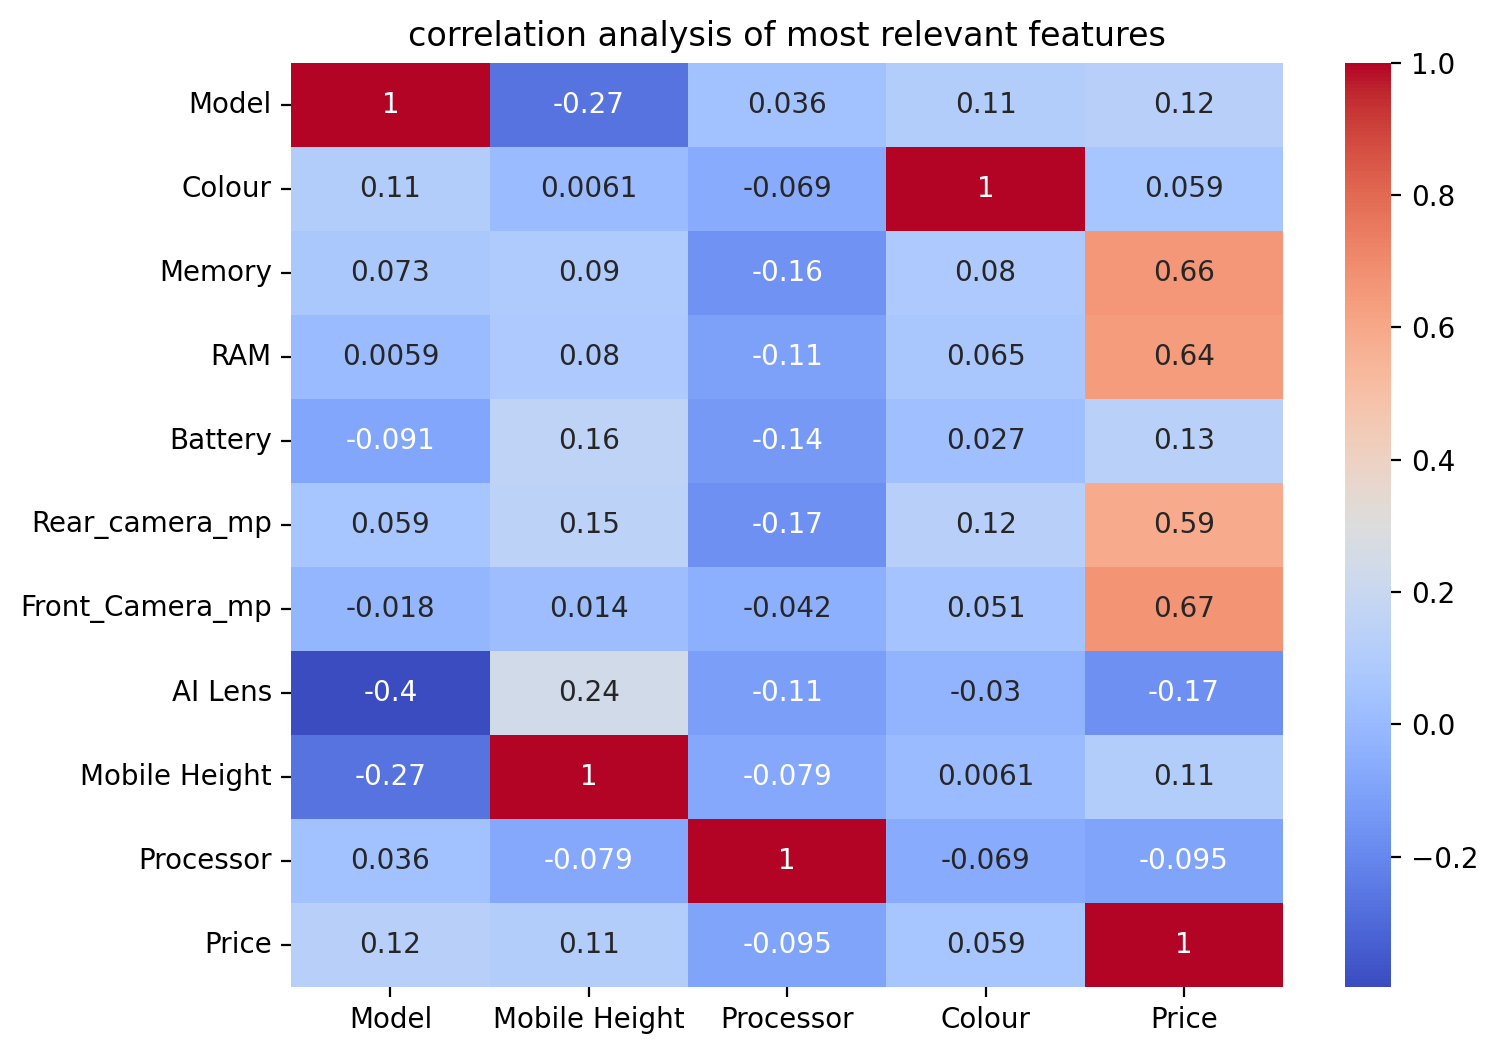

In [456]:
plt.figure(figsize = (8,6),dpi = 200)
sns.heatmap(mobile_data_clean.corr()[['Model','Mobile Height','Processor','Colour','Price']],annot = True,cmap = 'coolwarm')
plt.title('correlation analysis of most relevant features')

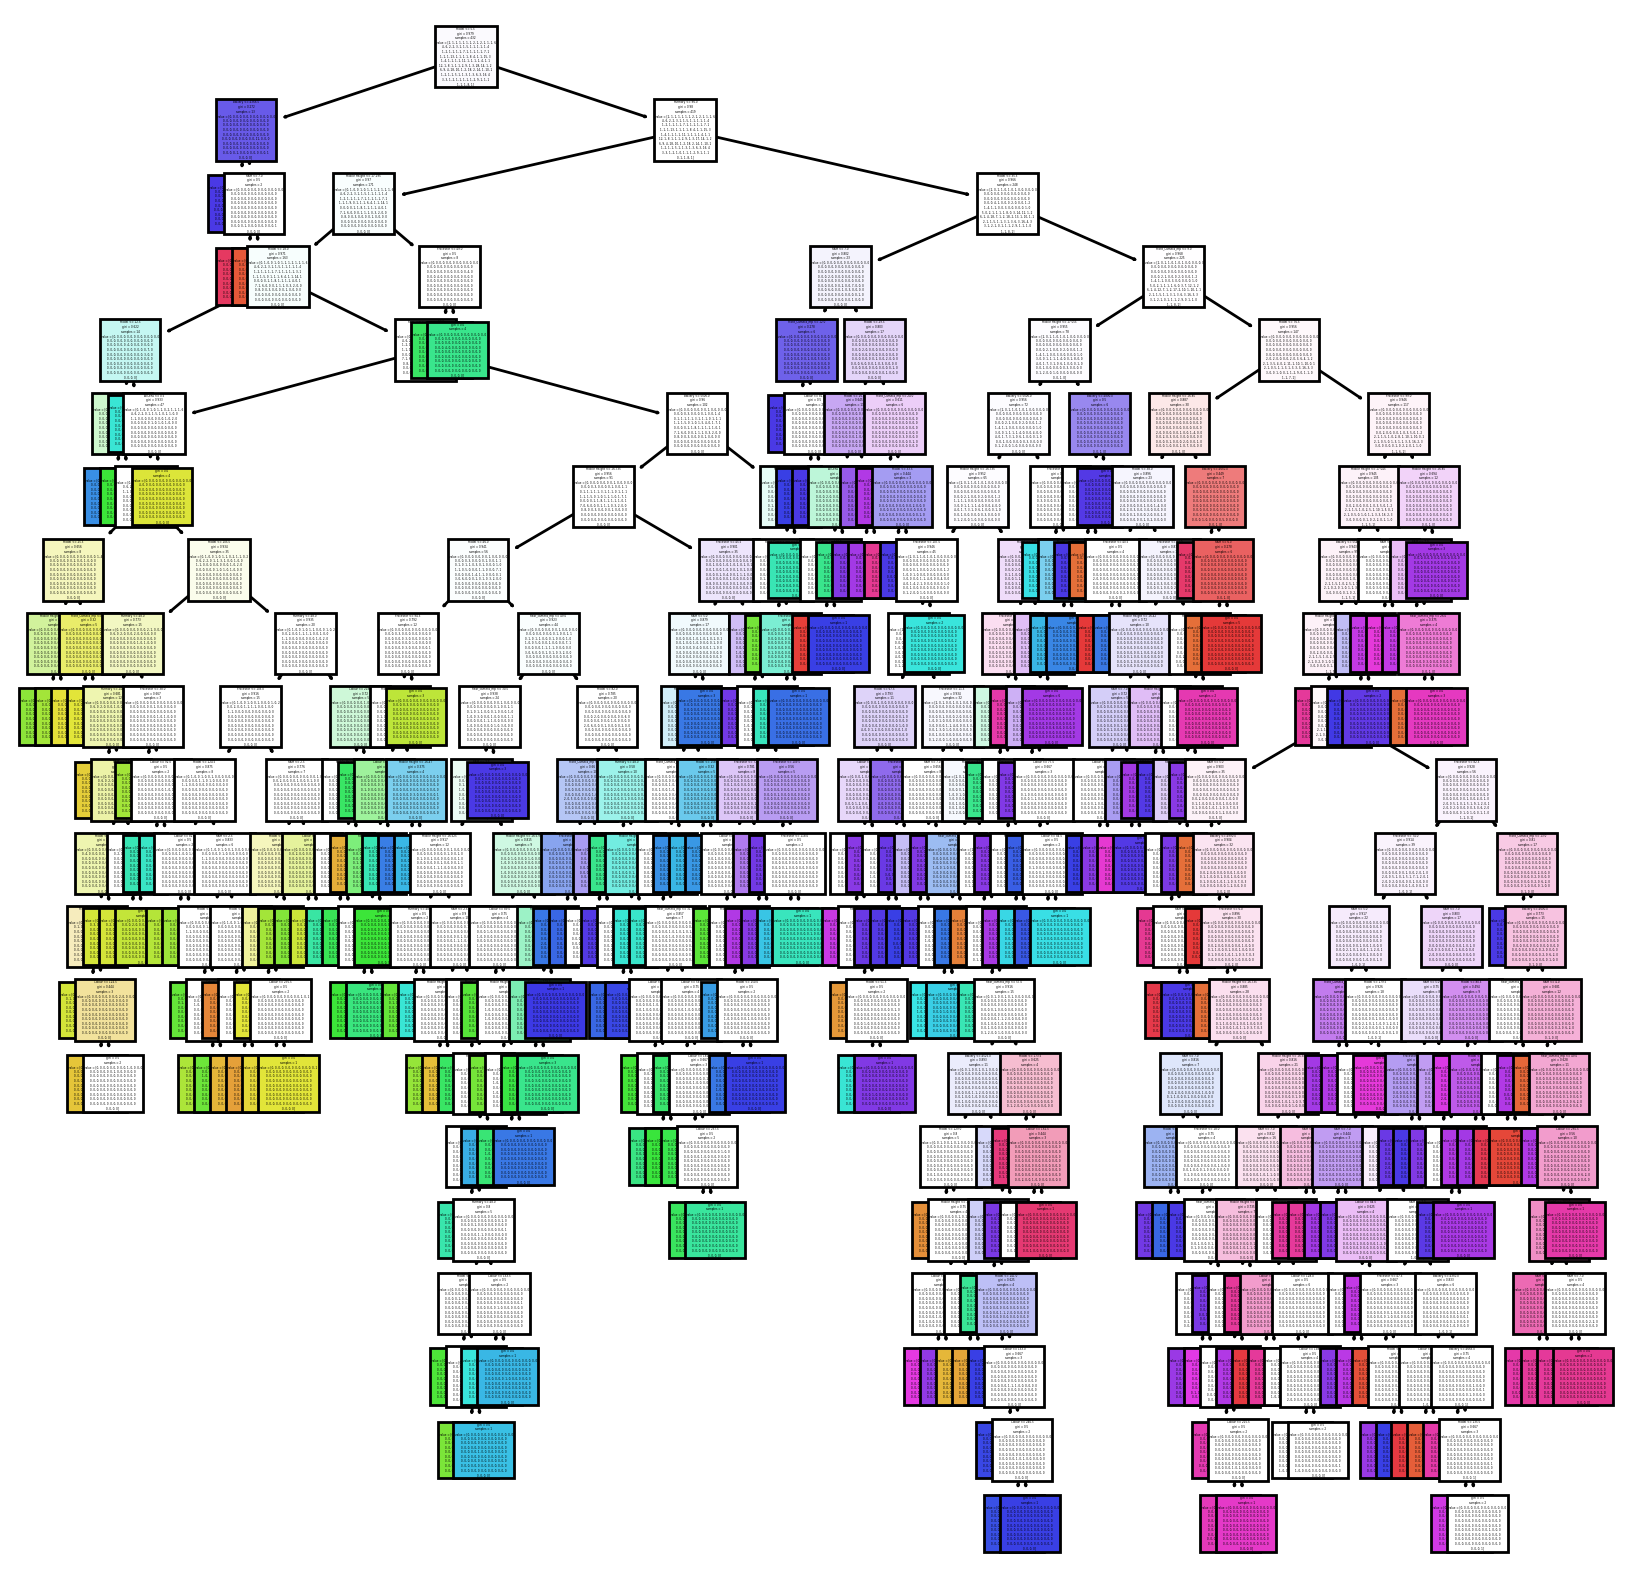

In [457]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,10),dpi = 200)
plot_tree(dtmodel,feature_names = X.columns,filled = True);

In [422]:
def report_model(dtmodel):
    based_pred = dtmodel.predict(X_test)
    print(classification_report(y_test,base_pred))
    print('\n')

In [423]:
report_model(dtmodel)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1449.0       0.00      0.00      0.00         0
      1699.0       0.00      0.00      0.00         1
      2490.0       0.00      0.00      0.00         0
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5999.0       1.00      1.00      1.00         2
      6499.0       0.00      0.00      0.00         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7280.0       0.00      0.00      0.00         0
      7299.0       1.00    

Here is the accuracy is 60 %

In [424]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [425]:
report_model(pruned_tree)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1449.0       0.00      0.00      0.00         0
      1699.0       0.00      0.00      0.00         1
      2490.0       0.00      0.00      0.00         0
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5999.0       1.00      1.00      1.00         2
      6499.0       0.00      0.00      0.00         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7280.0       0.00      0.00      0.00         0
      7299.0       1.00    

In [426]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes = 3)
max_leaf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [427]:
report_model(max_leaf_tree)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1449.0       0.00      0.00      0.00         0
      1699.0       0.00      0.00      0.00         1
      2490.0       0.00      0.00      0.00         0
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5999.0       1.00      1.00      1.00         2
      6499.0       0.00      0.00      0.00         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7280.0       0.00      0.00      0.00         0
      7299.0       1.00    

In [428]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [429]:
report_model(entropy_tree)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1449.0       0.00      0.00      0.00         0
      1699.0       0.00      0.00      0.00         1
      2490.0       0.00      0.00      0.00         0
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5999.0       1.00      1.00      1.00         2
      6499.0       0.00      0.00      0.00         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7280.0       0.00      0.00      0.00         0
      7299.0       1.00    

In [430]:
from sklearn.ensemble import RandomForestRegressor

In [431]:
mobile_data_clean.tail()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
536,118.0,49.0,128.0,8,3900,50.0,12.0,0,16.71,89.0,13499.0
537,32.0,52.0,32.0,2,3100,5.0,2.0,0,16.71,68.0,5998.0
538,123.0,259.0,64.0,4,5000,50.0,8.0,0,16.76,35.0,9990.0
539,110.0,17.0,128.0,8,5000,50.0,32.0,0,16.26,11.0,13499.0
540,59.0,215.0,128.0,4,5000,50.0,8.0,0,16.66,57.0,15999.0


In [432]:
model = RandomForestRegressor()

In [433]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [434]:
predictions = model.predict(X_train)
print('the model score is:', model.score(X_train,y_train))

the model score is: 0.9696454633885739


In [435]:
# Make the prediction:
new_data = X_test
y_pred = model.predict(new_data)

In [436]:

Predicted_price = y_pred
actual_price= y_test
test_residuals = y_test - y_pred
comparison = create_dataframe(Predicted_price, actual_price,test_residuals,'Predicted price','Actual price','Error')
print(comparison)

     Predicted price  Actual price        Error
499     16906.990000       16999.0    92.010000
486     18414.000000       17499.0  -915.000000
65      14649.940000       14490.0  -159.940000
41      11001.310000       10999.0    -2.310000
326     27002.860000       32999.0  5996.140000
403     32203.550000       30999.0 -1204.550000
514     12381.394500       11999.0  -382.394500
250      2148.020000        1199.0  -949.020000
47      11191.630000        9999.0 -1192.630000
172      6071.505000        5999.0   -72.505000
383      9040.440000        9499.0   458.560000
261     24252.730000       21999.0 -2253.730000
528     17888.820000       17499.0  -389.820000
260     23938.710000       21999.0 -1939.710000
465     15555.010000       13499.0 -2056.010000
119     11759.720000       11999.0   239.280000
244      2638.400000        3549.0   910.600000
479      8785.230000        8999.0   213.770000
107     15122.430000       15999.0   876.570000
247      1853.720000         920.0  -933

In [437]:
mean_absolute_error(y_test,y_pred)

1000.8184617737004

In [438]:
mean_squared_error(y_test,y_pred)

2505986.2268058755

In [439]:
metrics.explained_variance_score(y_test,y_pred)

0.9569927142872898

We found that the model score for Random forest is the higher then any other model

In [440]:
# Make the prediction:
new_data = X_test
y_pred = model.predict(new_data)

In [441]:
Predicted_price = y_pred
actual_price= y_test
test_residuals = y_test - y_pred
comparison = create_dataframe(Predicted_price, actual_price,test_residuals,'Predicted price','Actual price','Error')
print(comparison)

     Predicted price  Actual price        Error
499     16906.990000       16999.0    92.010000
486     18414.000000       17499.0  -915.000000
65      14649.940000       14490.0  -159.940000
41      11001.310000       10999.0    -2.310000
326     27002.860000       32999.0  5996.140000
403     32203.550000       30999.0 -1204.550000
514     12381.394500       11999.0  -382.394500
250      2148.020000        1199.0  -949.020000
47      11191.630000        9999.0 -1192.630000
172      6071.505000        5999.0   -72.505000
383      9040.440000        9499.0   458.560000
261     24252.730000       21999.0 -2253.730000
528     17888.820000       17499.0  -389.820000
260     23938.710000       21999.0 -1939.710000
465     15555.010000       13499.0 -2056.010000
119     11759.720000       11999.0   239.280000
244      2638.400000        3549.0   910.600000
479      8785.230000        8999.0   213.770000
107     15122.430000       15999.0   876.570000
247      1853.720000         920.0  -933

In [442]:
mean_absolute_error(y_test,y_pred)

1000.8184617737004

In [443]:
mean_squared_error(y_test,y_pred)

2505986.2268058755

In [444]:
metrics.explained_variance_score(y_test,y_pred)

0.9569927142872898

#We found that the model score for the Random forest is the higher then any other model

Evaluating performance using R2 score

In [445]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [446]:
#Predicting the test result

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

# Evaluating the model performance

In [447]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9624911578038229

In [448]:
Predicted_price = y_pred
actual_price= y_test
test_residuals = y_test - y_pred
comparison = create_dataframe(Predicted_price, actual_price,test_residuals,'Predicted price','Actual price','Error')
print(comparison)# Predicted price is very much closer to the actual price.

     Predicted price  Actual price   Error
499          17349.0       16999.0  -350.0
486          18349.0       17499.0  -850.0
65           14191.8       14490.0   298.2
41           10808.8       10999.0   190.2
326          28249.0       32999.0  4750.0
403          29698.1       30999.0  1300.9
514          12588.6       11999.0  -589.6
250           1679.1        1199.0  -480.1
47           10719.0        9999.0  -720.0
172           6198.9        5999.0  -199.9
383           8632.2        9499.0   866.8
261          22288.1       21999.0  -289.1
528          17149.0       17499.0   350.0
260          22188.1       21999.0  -189.1
465          15849.0       13499.0 -2350.0
119          11977.2       11999.0    21.8
244           2406.3        3549.0  1142.7
479           8548.1        8999.0   450.9
107          16049.0       15999.0   -50.0
247           1748.1         920.0  -828.1
133           1968.6        2615.0   646.4
438          19199.0       20999.0  1800.0
355        

In [449]:
mean_absolute_error(y_test,y_pred)

959.7816513761469

In [450]:
mean_squared_error(y_test,y_pred)

2166955.1565137617

In [451]:
metrics.explained_variance_score(y_test,y_pred)

0.9625355405813445

#Here we found that the best model algorithem is random forest regression

In [455]:
# Import necessary library
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Regressor - MAE: {mae_gb}, MSE: {mse_gb}')

Gradient Boosting Regressor - MAE: 1251.1178496137547, MSE: 3841398.947573686
